In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
df=pd.read_csv("CarPricePrediction.csv")
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [4]:
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [5]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [6]:
df.nunique()

name             1491
year               27
selling_price     445
km_driven         770
fuel                5
seller_type         3
transmission        2
owner               5
dtype: int64

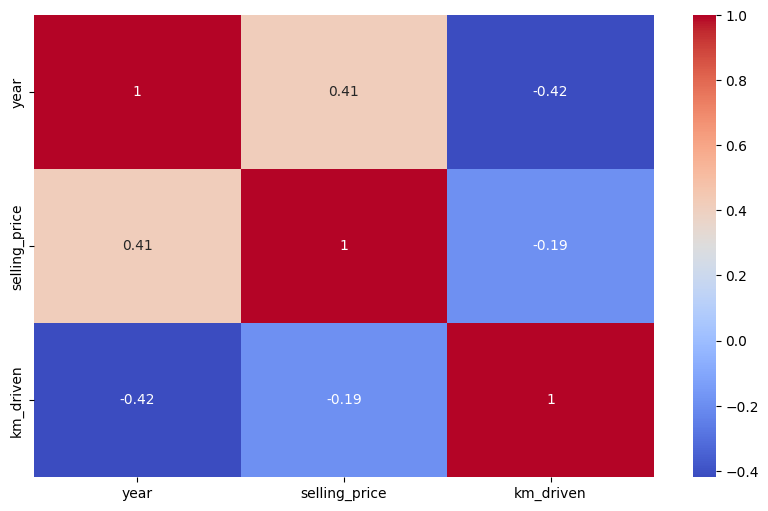

In [7]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.show()

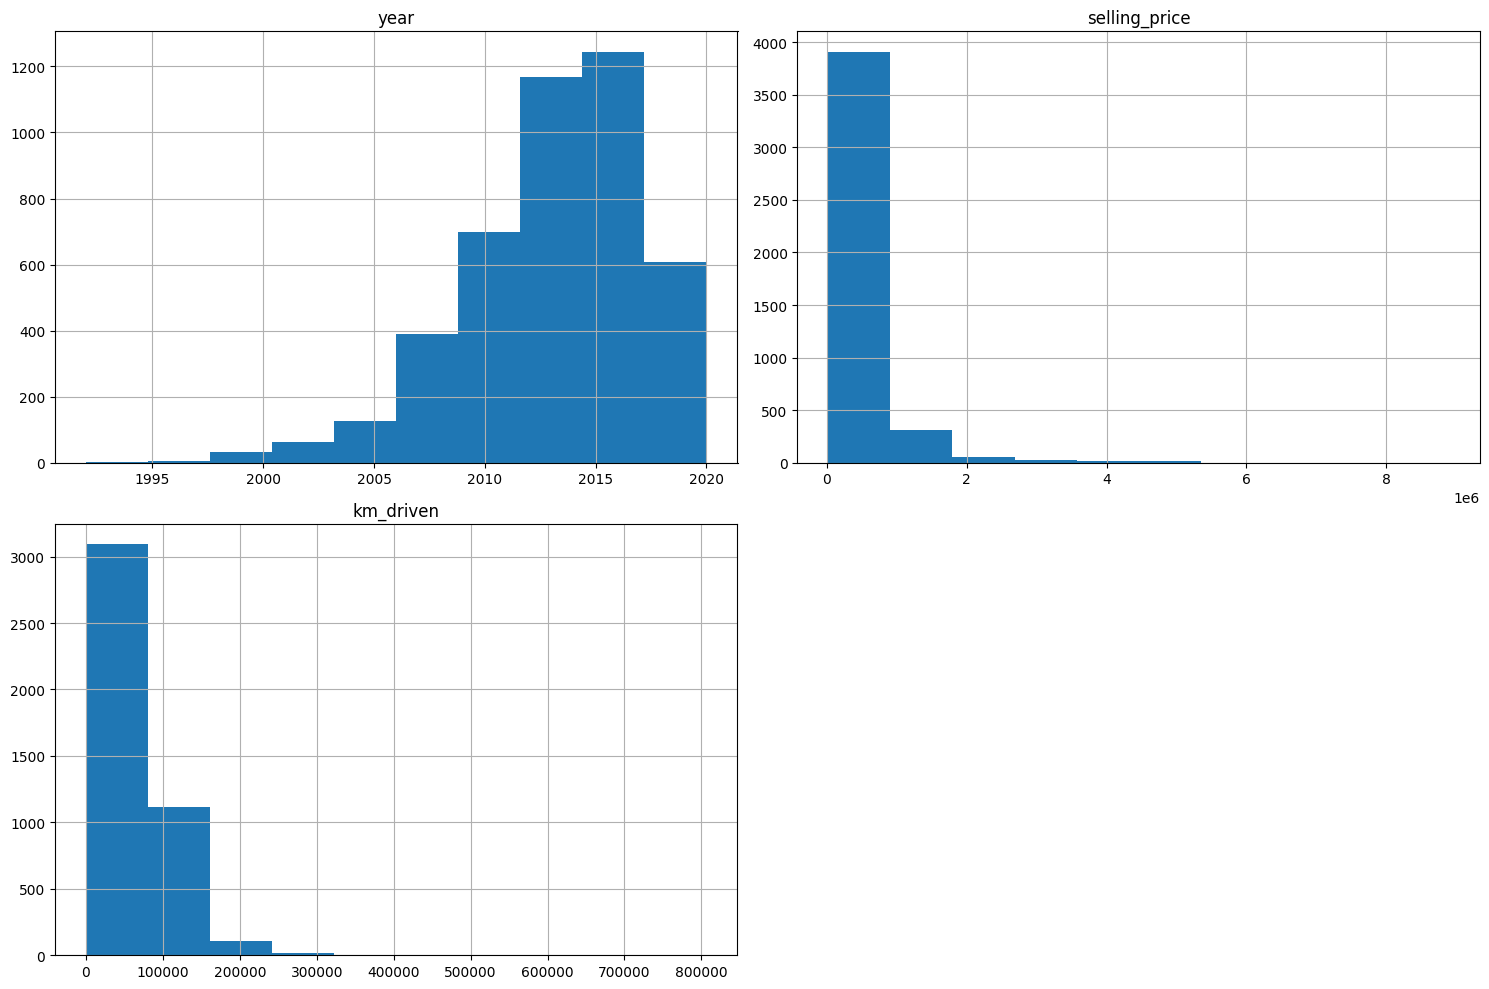

In [8]:
df.hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

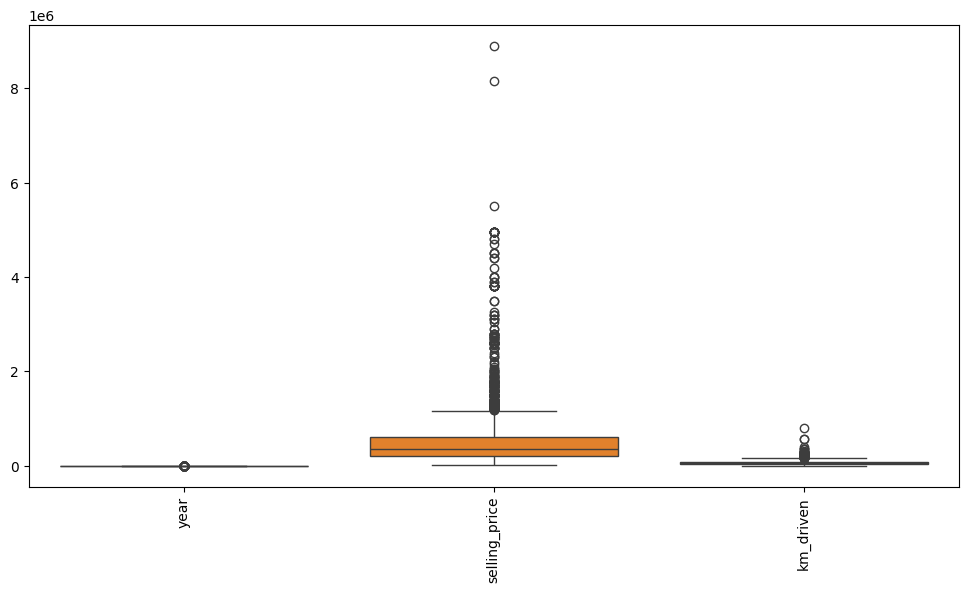

In [9]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.select_dtypes(include=np.number))
plt.xticks(rotation=90)
plt.show()

In [18]:
X = df.drop("selling_price", axis=1)
y = df["selling_price"]
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(categorical_cols)
print(numeric_cols)

['name', 'fuel', 'seller_type', 'transmission', 'owner']
['year', 'km_driven']


In [19]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols)
    ]
)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [30]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r2)

MAE: 120932.26878754432
MSE: 116188888644.34749
RMSE: 340864.91260372853
R2 Score: 0.6192653939703856


In [38]:
feature_names = model.named_steps['preprocessor'].transformers_[0][2] + \
                list(model.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(categorical_cols))

coefficients = model.named_steps['regressor'].coef_
feature_importance = pd.Series(coefficients, index=feature_names).sort_values(ascending=False)
print(feature_importance.head(10))

name_Mercedes-Benz S-Class S 350d Connoisseurs Edition    6.638223e+06
name_Mercedes-Benz GLS 2016-2020 350d 4MATIC              4.053600e+06
name_BMW X5 xDrive 30d xLine                              3.398823e+06
name_Mercedes-Benz E-Class Exclusive E 200 BSIV           3.252013e+06
name_Audi A5 Sportback                                    3.127007e+06
name_Mercedes-Benz GL-Class 350 CDI Blue Efficiency       3.060096e+06
name_Volvo XC 90 D5 Inscription BSIV                      3.049024e+06
name_Land Rover Range Rover 4.4 Diesel LWB Vogue SE       2.923357e+06
name_Land Rover Discovery S 2.0 SD4                       2.804318e+06
name_BMW 7 Series Signature 730Ld                         2.609396e+06
dtype: float64


In [42]:
!pip install fpdf


Defaulting to user installation because normal site-packages is not writeable
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for fpdf: filename=fpdf-1.7.2-py2.py3-none-any.whl size=40769 sha256=d9c9c4ad5e01cdd8fdf56184817200873f555c5970d86f6c098448f4c018bf6f
  Stored in directory: c:\users\sdhar\appdata\local\pip\cache\wheels\6e\62\11\dc73d78e40a218ad52e7451f30166e94491be013a7850b5d75
Successfully built fpdf


In [3]:
from fpdf import FPDF
pdf = FPDF()
pdf.add_page()
pdf.set_font("Arial", size=12)
pdf.set_font("Arial", 'B', 14)
pdf.cell(200, 10, "Car Price Prediction Model - Short Report", ln=True, align='C')
pdf.ln(10)
pdf.set_font("Arial", 'B', 12)
pdf.cell(200, 10, "1. EDA Insights", ln=True)
pdf.set_font("Arial", size=12)
eda_text = """The dataset was analyzed for distributions, missing values, and correlations.
- Numeric features like mileage, year, and kilometers driven showed skewed distributions.
- Correlation heatmap revealed moderate correlation between selling price and features like year and mileage.
- Boxplots helped identify potential outliers in numerical columns."""
pdf.multi_cell(0, 10, eda_text)
pdf.set_font("Arial", 'B', 12)
pdf.cell(200, 10, "2. Model Results", ln=True)
pdf.set_font("Arial", size=12)
model_results = f"""A Linear Regression model was trained on the dataset.
Model performance metrics on test data:
- Mean Absolute Error (MAE): [MAE]
- Mean Squared Error (MSE): [MSE]
- Root Mean Squared Error (RMSE): [RMSE]
- R² Score: [R2]
"""
pdf.multi_cell(0, 10, model_results)
pdf.set_font("Arial", 'B', 12)
pdf.cell(200, 10, "3. Conclusion", ln=True)
pdf.set_font("Arial", size=12)
conclusion = """The Linear Regression model provides a baseline for car price prediction.
Some features like car age, fuel type, and transmission type significantly impact price.
Further improvements could include advanced models and feature engineering to capture non-linear relationships."""
pdf.multi_cell(0, 10, conclusion)
pdf.output("Car_Price_Prediction_Report.pdf")

''

In [6]:
import os
from fpdf import FPDF
pdf.output("Car_Price_Prediction_Report.pdf")
os.startfile("Car_Price_Prediction_Report.pdf")